# Linear Models and Linear Regression 

This code is to help us visualize the linear regression models. <br>

This tutorial can be deployed in 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/linear_regression.ipynb)


Let's define a linear model,
$$
f(\mathbf{w},x) = a\;x + b
$$
or in a vector notation,
$$
f(\mathbf{w},x) = \begin{bmatrix}
b, & a \end{bmatrix}  \begin{bmatrix}
1 \\
 x \\
\end{bmatrix}
$$

As we will see, the parameters of the linear model, $\mathbf{w}^\top=[m,b]$, are *free parameters*. <br>
Meaning, we usually use a metric function, commonly named to **loss function**, to search for the **optimal parameters**.<br>

The loss function measures the distance between the predicted values, $f(x,\mathbf{w})$, and true values, $\hat{y}$,. <br>

For example the square error, 
$$
\epsilon(x_i,\mathbf{w}) = \frac{1}{2}\left (\hat{y}_i - f(x_,\mathbf{w}) \right )^{2} = \frac{1}{2}\left (\hat{y}_i - (m\;x_i + b)) \right )^{2}
$$
the $\frac{1}{2}$ factor only rescales the error between the predicted values and the actual values. (hint: $\frac{d x^2}{d\;x}$).

**Extra**:<br>
The square error is not the only possible loss function that one can use. <br>
For example, the absolute error,
$$
\epsilon(x,\mathbf{w}) = \left | \hat{y}_i - (m\;x + b)) \right |
$$
leads to a family of linear models known as [Least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations)


In [1]:
# when deployed in Colab uncomment this line to install ipyml
#!pip install ipympl 

In [2]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from ipywidgets import interact, FloatSlider

In [3]:
def linear_model(m,b,x):
    return m*x + b

In [4]:
# generate som "True" data
x = np.linspace(0, 2, 5)
m = 2
b = 1
y = linear_model(m, b, x) + np.random.uniform(-1, 2,size=x.shape) # add some noise

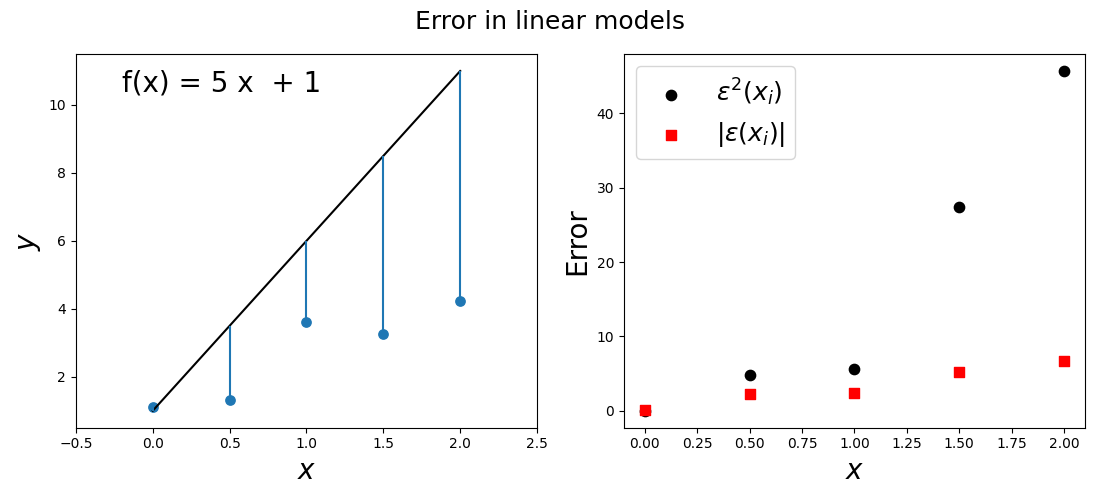

In [5]:
# change the values of a and b and see what happens
m = 5
b = 1

x_grid = np.linspace(0, 2, 100)
y_grid = linear_model(m, b, x_grid)

y_pred = linear_model(m, b, x)
error = y_pred - y

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,5))
fig.suptitle('Error in linear models',fontsize=18)

# left panel 
ax1.plot(x_grid, y_grid, c='k') # model prediction
for xi, yi in zip(x, y):
    y_pred_i = linear_model(m, b, xi)
    error_i = yi - y_pred_i # individual error
    if error_i > 0:
        ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i)) # up vertical line for error
    else:
        ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i) # down vertical line for error
ax1.text(0.1, .9, f'f(x) = {m} x  + {b}', fontsize=20, transform=ax1.transAxes)
ax1.scatter(x, y, s=45) # data points
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylabel(r'$y$', fontsize=20)
ax1.set_xlabel(r'$x$', fontsize=20)

# right panel
error_ = []
for xi, yi in zip(x, y):
    y_pred_i = linear_model(m, b, xi)
    error_i = yi - y_pred_i # individual error
    error_.append(error_i)
error_ = np.array(error_)
ax2.scatter(x, error_**2, color='k', s=55,label=r'$\epsilon^2(x_i)$')
ax2.scatter(x, np.abs(error_), color='r', s=55, marker='s',label=r'$|\epsilon(x_i)|$')   


ax2.set_ylabel(r'Error', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)

plt.legend(loc=0, fontsize=18)
plt.tight_layout()
# plt.savefig('fig_linear_model_errors.png',dpi = 260)

interactive(children=(FloatSlider(value=1.0, description='b', max=2.5, min=-2.5, step=0.01), FloatSlider(value…

<function __main__.draw(b=0.0, m=0.0)>

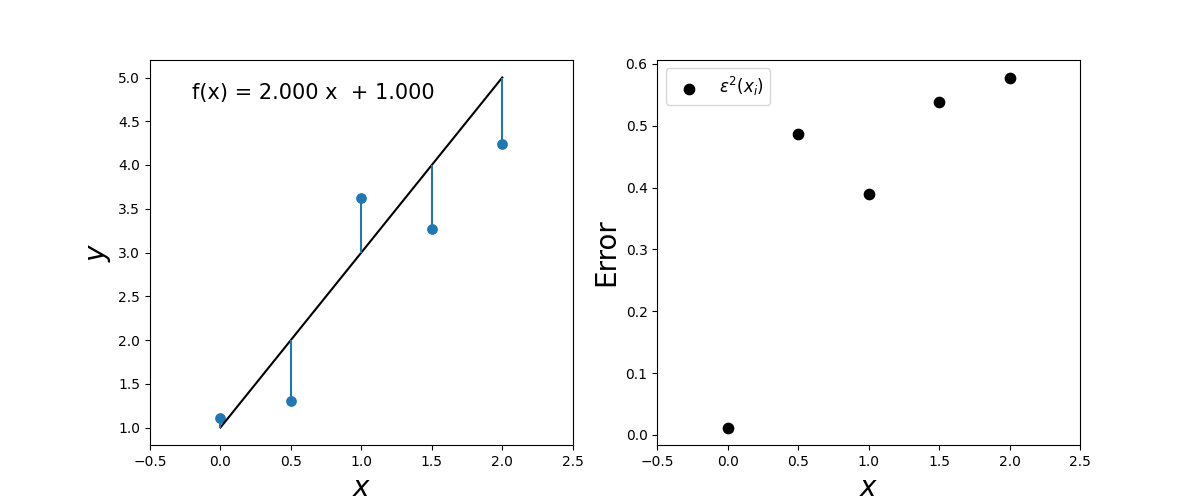

In [6]:
# --- Minimal, Colab-friendly ipywidgets demo for linear models: y = a + b x ---

# Dense grid for the model line
x_grid = np.linspace(0, 2, 100)

# ---- Plot function (like your draw(n=...)) ----
def draw(b=0.0, m=0.0):
    y_grid = linear_model(m, b, x_grid)
    y_pred = linear_model(m, b, x)
    error = y_pred - y

    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # left panel 
    ax1.plot(x_grid, y_grid, c='k')
    for xi, yi in zip(x, y):
        y_pred_i = linear_model(m, b, xi)
        error_i = yi - y_pred_i
        if error_i > 0:
            ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i))
        else:
            ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i)
    ax1.text(0.1, .9, f'f(x) = {m:.3f} x  + {b:.3f}',
             fontsize=15, transform=ax1.transAxes)
    ax1.scatter(x, y, s=45)
    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylabel(r'$y$', fontsize=20)
    ax1.set_xlabel(r'$x$', fontsize=20)

    # right panel
    error_ = []
    for xi, yi in zip(x, y):
        y_pred_i = linear_model(m, b, xi)
        error_i = yi - y_pred_i # individual error
        error_.append(error_i)
    error_ = np.array(error_)
    ax2.scatter(x, error_**2, color='k', s=55,label=r'$\epsilon^2(x_i)$')
    # ax2.scatter(x, np.abs(error_), color='r', s=55, marker='s',label=r'$|\epsilon(x_i)|$')  

    ax2.set_ylabel(r'Error', fontsize=20)
    ax2.set_xlabel(r'$x$', fontsize=20)
    # ax2.set_ylim(-0.5, 15.)
    ax2.set_xlim(-0.5, 2.5)
    plt.legend(loc=0, fontsize=12)

# ---- Widgets: only m and b ----
interact(
    draw,
    b=FloatSlider(value=1.0, min=-2.5, max=2.5, step=0.01, description="b"),
    m=FloatSlider(value=2.0, min=-2.5, max=3.5, step=0.01, description="m"),
)

## Mean squared error
To measure the quality of the the model on the entire collection of data points, **we simply average the individual errors**.<br>
The Mean Squared Error (MSE) is defined as:

$$
{\cal L}(\mathbf{w}) = \frac{1}{N} \sum_{i=i}^{N} \ell_i(\mathbf{w}) = \frac{1}{N} \sum_{i=i}^{N}  \underbrace{\frac{1}{2} \left (\hat{y}_i - \mathbf{w}^\top x_i \right )^2}_{\epsilon(x_i,\mathbf{w})} = \frac{1}{N} \sum_{i=i}^{N} \frac{1}{2} \left (\hat{y}_i - m\;x_i + b \right )^2,
$$
where $\mathbf{w}$ is $[m,b]$, the parameters of a linear model.

## Optimal model

Finding the optimal model (also known as training a model), means finding the value of $\mathbf{w}$, where ${\cal L}(\mathbf{w})$ has the lowest value. 
$$
\mathbf{w}^* = \argmin_{\mathbf{w}} {\cal L}(\mathbf{w}).
$$

For this lecture, we will use a **grid search** approach to search for $\mathbf{w}^*$.

In [7]:
def linear_model_total_error(m, b, x, y):
    y_pred = linear_model(m, b, x)
    error = y_pred - y
    error_sqr = error**2
    return 0.5 * np.mean(error_sqr)

Let's build a grid over $m$ and $b$.

Text(0, 0.5, 'Mean Square Error')

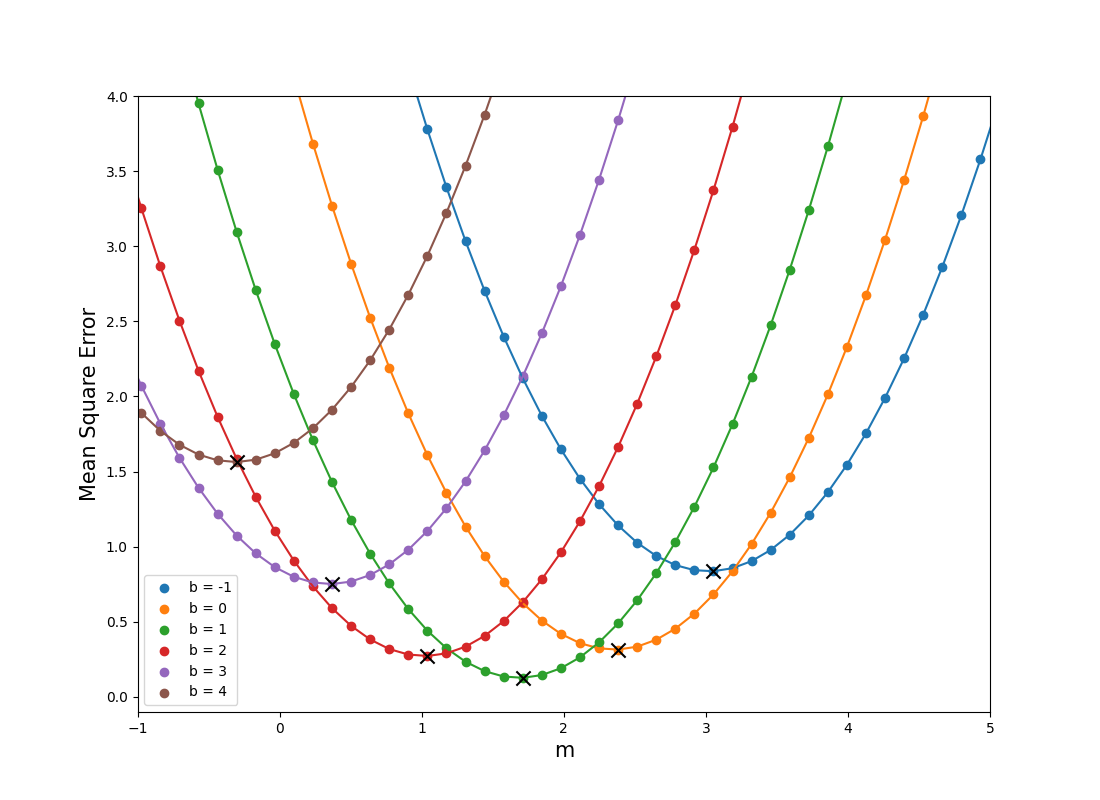

In [8]:
m_grid = np.linspace(-5,15,150) # slope
b_grid = np.arange(-1,5,1) # y-intercept

plt.figure(figsize=(11,8))
for bi in b_grid: # loop ver the y-intercept
    total_errors = [linear_model_total_error(mi, bi, x, y) for mi in m_grid] # flatten loop
    total_errors = np.asanyarray(total_errors)
    i0 = np.argmin(total_errors) # lowest error
    m_best = m_grid[i0] # best slope for a given b
    
    # plot
    plt.scatter(m_grid, total_errors,label= f'b = {bi}')
    plt.plot(m_grid, total_errors)
    plt.scatter(m_best,total_errors[i0],color='k',zorder=2.5,marker='x',s=105)
    
plt.legend()
plt.ylim(-0.1,4)
plt.xlim(-1,5)
plt.xlabel('m',fontsize=15)
plt.ylabel('Mean Square Error', fontsize=15)

In Python one can "flatten" a for loop 
```python
total_errors = [linear_model_total_error(mi, b, x, y) for mi in m_grid] # returns a list
# total_errors is a list
```

is the same as, 
```python
error = []
for mi in m_grid:
    error_i = linear_model_total_error(mi, b, x, y) 
    error.append(error_i)
# variable error is a list
```

Let's build a denser grid and plot ${\cal L}$ as a function of $m$ and $b$.

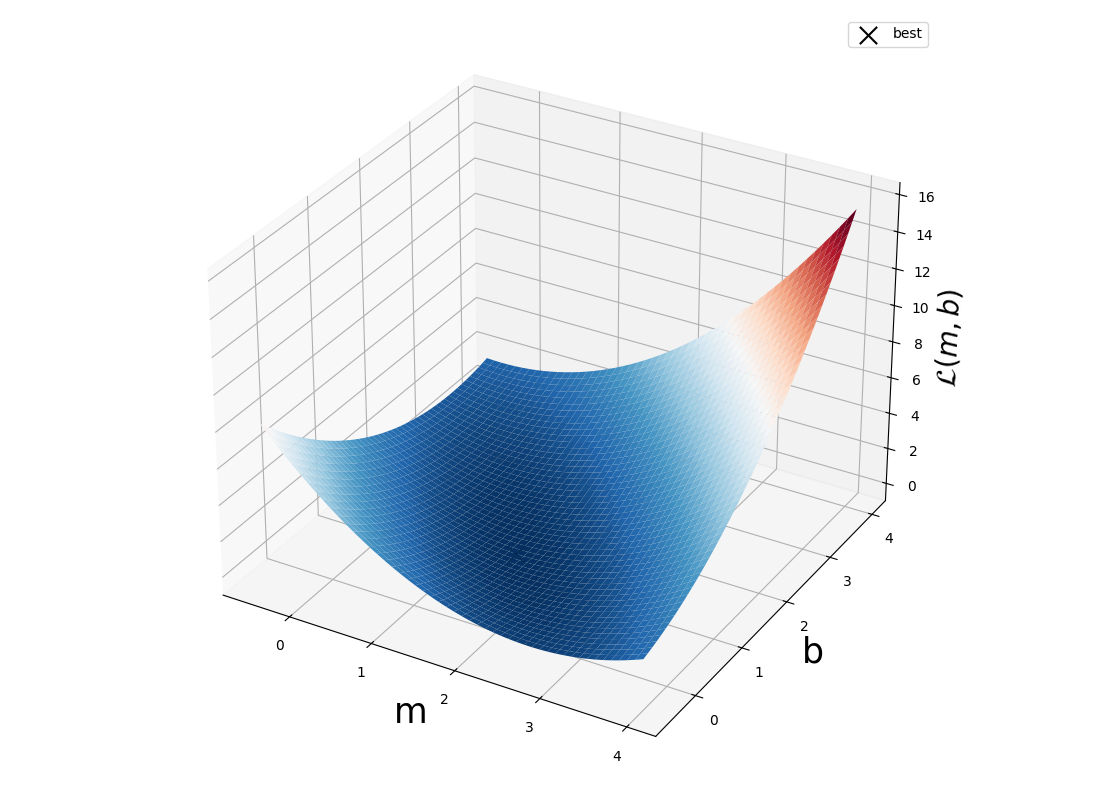

In [9]:
m_grid = np.linspace(-0.5, 4, 50)
b_grid = np.linspace(-0.5, 4, 50)
m_, b_ = np.meshgrid(m_grid, b_grid)
m_b = np.column_stack((m_.flatten(), b_.flatten()))

total_error_ = []
for mbi in m_b:
    m,b = mbi[0],mbi[1]
    ei = linear_model_total_error(m, b, x, y)
    total_error_.append(ei)
total_error_ = np.array(total_error_)
i0 = np.argmin(total_error_)

mb_best = m_b[i0]
lowest_error = total_error_[i0]


plt.figure(figsize=(11, 8))
total_error_ = total_error_.reshape(m_.shape)
ax = plt.axes(projection='3d')
ax.scatter(mb_best[0], mb_best[1], lowest_error,
           zorder=10, color='k', marker='x', s=155, label="best") 
ax.plot_surface(m_, b_, total_error_, rstride=1, cstride=1,
                cmap='RdBu_r', edgecolor='none')

ax.set_xlabel('m',fontsize=25)
ax.set_ylabel('b', fontsize=25)
ax.set_zlabel(r'${\cal L}(m,b)$', fontsize=20,rotation=90)
plt.legend()
# ax.view_init(elev=30, azim=-120)
plt.tight_layout()

Best parameters (m,b) and lowest error:
m* = 1.612245
b* = 1.061224
L = 0.127318
--------------------


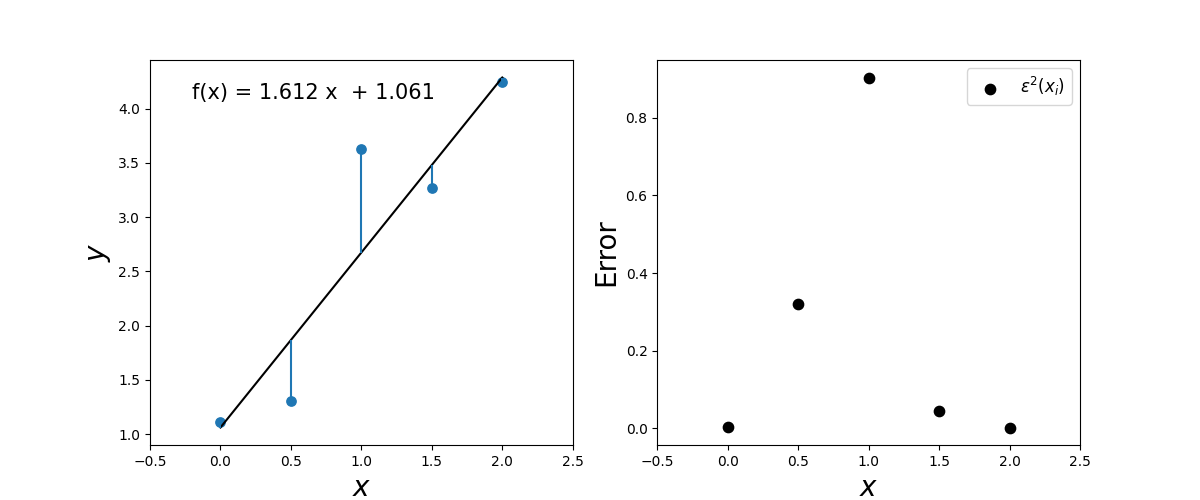

In [10]:
m, b = mb_best[0], mb_best[1]  # optimal parameters
print("Best parameters (m,b) and lowest error:")
print(f"m* = {m:3f}")
print(f"b* = {b:3f}")
print(f"L = {lowest_error:3f}")
print(10*"--")

draw(b,m)

## (Recap) Linear models

We are usually defined linear models as functions, $f(x,\mathbf{w})= a\;x + b$. <br>
However, they can also be defined in terms of matrix-vector multiplication. <br>
Let's assume we have a collection of 10 points and we want to use our linear model for prediction.<br>
We can represent each point as an ``new'' vector to account for the *bias term*.

Let's build the design matrix for these ($\mathbf{X}$) ten points, 
$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}_{0}^\top \\
\mathbf{x}_{1}^\top \\
 \vdots \\
\mathbf{x}_{10}^\top \\
\end{bmatrix} = \begin{bmatrix}
1 & x_{0} \\
1 & x_{1} \\
 \vdots \\
1 & x_{10} \\
\end{bmatrix}
$$

Prediction with linear models
$$
\underbrace{\mathbf{X}}_{(10,2)} \underbrace{\mathbf{w}}_{(2,1)} = \begin{bmatrix}
\mathbf{x}_{0}^\top \\
\mathbf{x}_{1}^\top \\
 \vdots \\
\mathbf{x}_{10}^\top \\
\end{bmatrix}\begin{bmatrix}
b \\
a \\
\end{bmatrix}= \begin{bmatrix}
1 & x_{0} \\
1 & x_{1} \\
 \vdots \\
1 & x_{10} \\
\end{bmatrix}\begin{bmatrix}
b \\
a \\
\end{bmatrix} = \begin{bmatrix}
b + a\;x_{0} \\
b + a\;x_{1} \\
 \vdots \\
b + a\;x_{10} \\
\end{bmatrix} = \underbrace{\begin{bmatrix}
fx_{0}) \\
f(x_{1}) \\
 \vdots \\
f(x_{10}) \\
\end{bmatrix}}_{(10,1)}
$$


X:  (100, 2)
[[1.         0.        ]
 [1.         0.02020202]
 [1.         0.04040404]]
w = [m,b]:   (2, 1)
[[1.06122449]
 [1.6122449 ]]


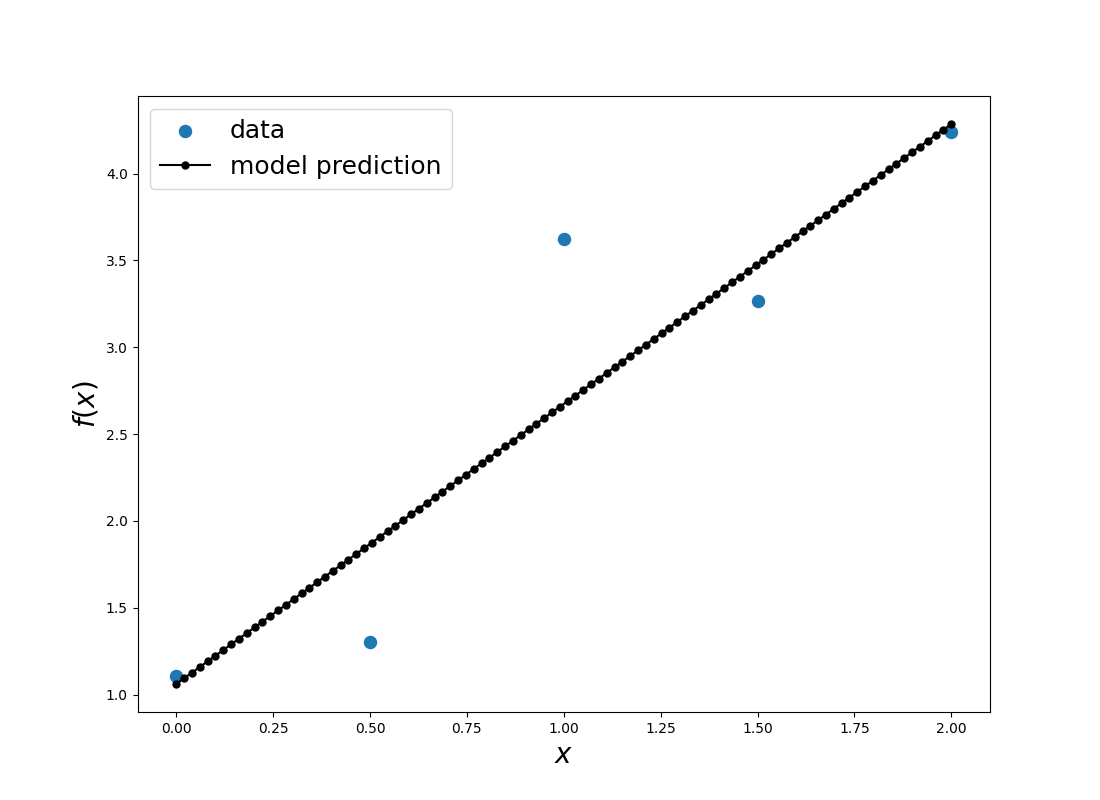

In [11]:
# Build the design matrix

x_grid = np.linspace(-0,2,100) #change the number of points
X = np.column_stack((np.ones_like(x_grid), x_grid))
print("X: ", X.shape)
print(X[:3,:])  # print first 3 rows

# w = ab_best[:,None]
w = np.array([[mb_best[1]],[mb_best[0]]])
print("w = [m,b]:  ", w.shape)
print(w)

# prediction 
y_pred = X @ w

# plot the result
fig, ax = plt.subplots(figsize=(11, 8))
ax.scatter(x, y, label='data', s=75)
ax.plot(x_grid, y_pred, c='k', marker='o', label='model prediction',markersize=5)

ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$f(x)$', fontsize=20)
ax.legend(fontsize=18)

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-2.0, step=0.01), FloatSlider(value…

<function __main__.draw(b=0.0, m=0.0)>

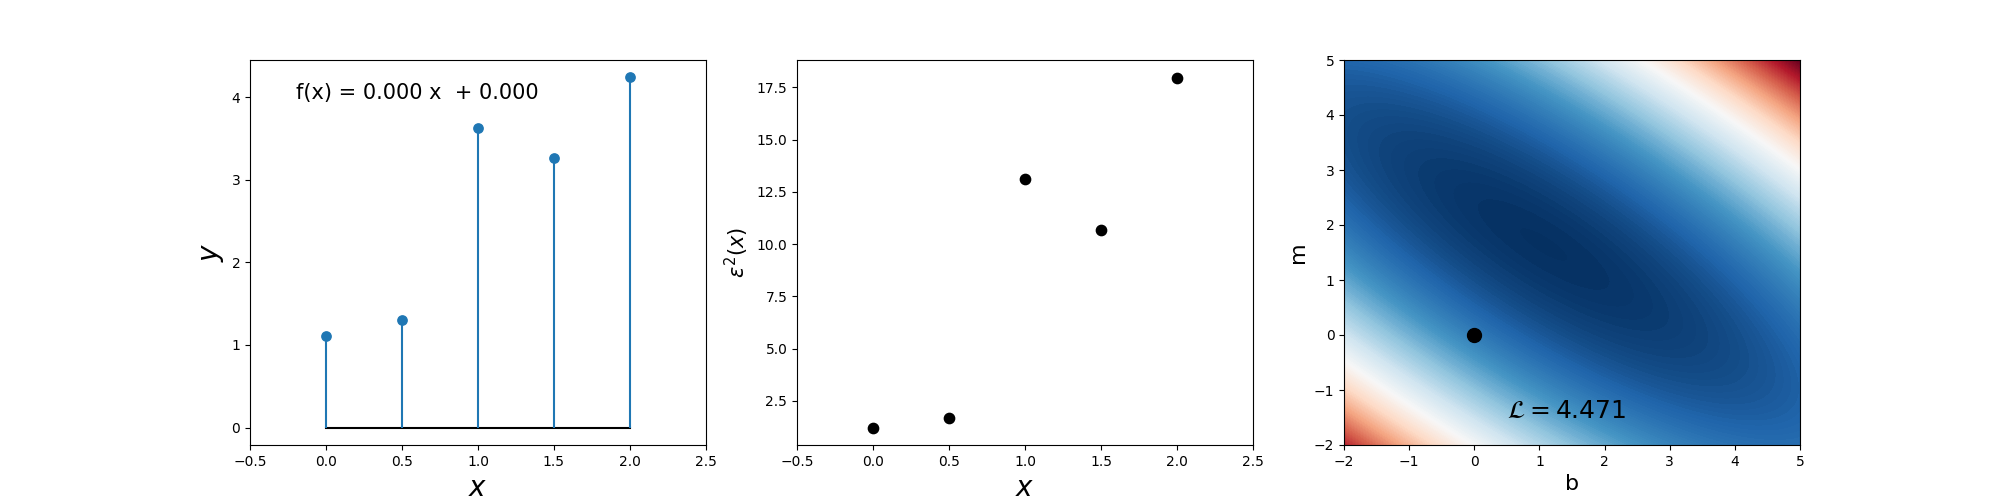

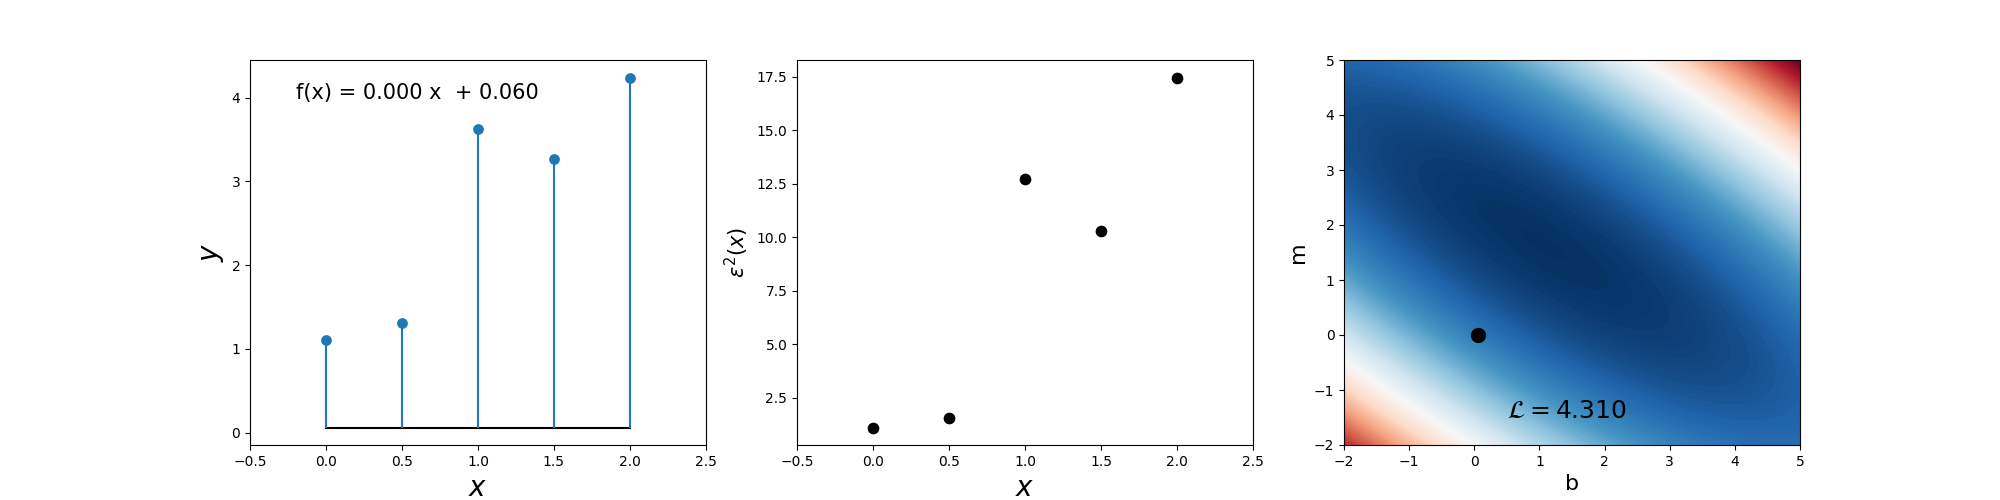

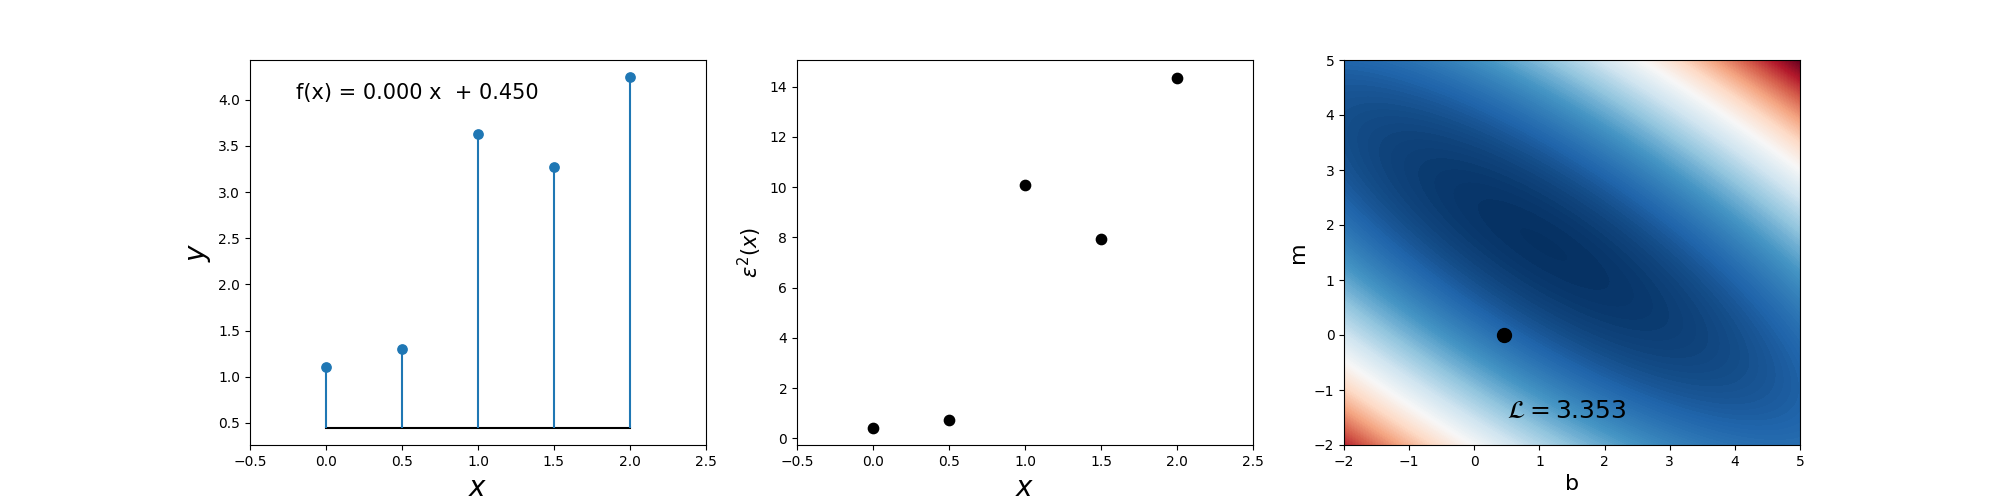

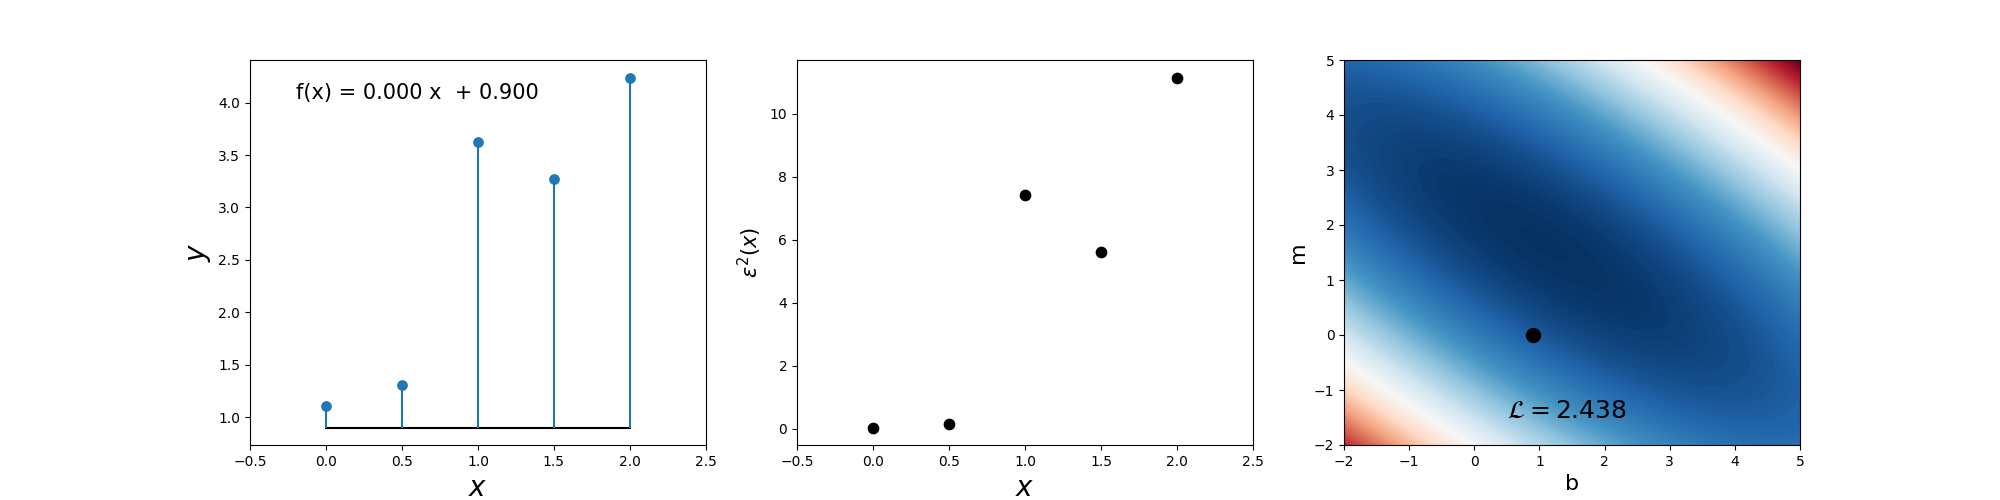

In [12]:
# --- Minimal, Colab-friendly ipywidgets demo for linear models: y = a + b x ---

# Dense grid for the model line
x_grid = np.linspace(0, 2, 100)

# Grid over parameters
m = np.linspace(-2., 5, 200)  # slope
b = np.linspace(-2., 5, 200)  # intercept

M, B = np.meshgrid(m, b)
m_ = M.flatten()
b_ = B.flatten()

errors = []
for mi, bi in zip(m_, b_):
    w = np.array([[bi], [mi]])
    # compute error for each (mi, bi,)
    error = linear_model_total_error(mi, bi, x, y)
    errors.append(error)

# reshape errors to grid
errors = np.array(errors).reshape(M.shape)


# ---- Plot function (like your draw(n=...)) ----


def draw(b=0.0, m=0.0):
    y_grid = linear_model(m, b, x_grid)
    y_pred = linear_model(m, b, x)
    error = y_pred - y

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

    # left panel
    ax1.plot(x_grid, y_grid, c='k')
    for xi, yi in zip(x, y):
        y_pred_i = linear_model(m, b, xi)
        error_i = yi - y_pred_i
        if error_i > 0:
            ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i))
        else:
            ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i)
    ax1.text(0.1, .9, f'f(x) = {m:.3f} x  + {b:.3f}',
             fontsize=15, transform=ax1.transAxes)
    ax1.scatter(x, y, s=45)
    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylabel(r'$y$', fontsize=20)
    ax1.set_xlabel(r'$x$', fontsize=20)

    # right panel
    error_ = []
    for xi, yi in zip(x, y):
        y_pred_i = linear_model(m, b, xi)
        error_i = yi - y_pred_i  # individual error
        error_.append(error_i)
    error_ = np.array(error_)
    ax2.scatter(x, error_**2, color='k', s=55)
    # ax2.scatter(x, np.abs(error_), color='r', s=55, marker='s',label=r'$|\epsilon(x_i)|$')

    ax2.set_ylabel(r'$\epsilon^2(x)$', fontsize=15)
    ax2.set_xlabel(r'$x$', fontsize=20)
    # ax2.set_ylim(-0.5, 15.)
    ax2.set_xlim(-0.5, 2.5)
    
    y_pred = linear_model(m, b, x) # only the data
    error = linear_model_total_error(m, b, x, y)
    ax3.contourf(B, M, errors, levels=200, cmap='RdBu_r')
    ax3.scatter([b], [m], color='k', s=100)  # current point
    ax3.text(0.5,-1.5, r"${\cal L} = $" + f"{error:.3f}", fontsize=18)
    ax3.set_xlabel('b', fontsize=16)
    ax3.set_ylabel('m', fontsize=16)


# ---- Widgets: only m and b ----
interact(
    draw,
    b=FloatSlider(value=0.0, min=-2., max=5., step=0.01, description="b"),
    m=FloatSlider(value=0.0, min=-2., max=5., step=0.01, description="m"),
)

# Least Squares
The **least square** problem is synonym of the optimization algorithm for linear models. <br>
Let's code the solution of the least squares problem using the matrix notation that we cover in class. <br>
First, we will define the mean squared error as,
$$
 {\cal L}(\mathbf{w}) = \frac{1}{N} \sum_{i=i}^{N}  \frac{1}{2} \left (\hat{y}_i - \mathbf{w}^\top x_i \right )^2 = \frac{1}{2N} \left (\mathbf{Y}^\top \mathbf{Y} - 2\mathbf{Y}^\top\mathbf{X} \mathbf{w}  + \mathbf{w}^\top \mathbf{X}^\top\mathbf{X} \mathbf{w} \right )
$$
Then we will proceed to compute the Jacobian of ${\cal L}(\mathbf{w})$ with respect to the parameters of the model, $\mathbf{w}^\top = [b,a]$,
$$
 \frac{\partial }{\partial \mathbf{w}}{\cal L}(\mathbf{w}) = \frac{1}{2N} \frac{\partial }{\partial \mathbf{w}}\left (\mathbf{Y}^\top \mathbf{Y} - 2\mathbf{Y}^\top\mathbf{X} \mathbf{w}  + \mathbf{w}^\top \mathbf{X}^\top\mathbf{X} \mathbf{w} \right )
$$
which give us three unique terms,
$$
\frac{\partial }{\partial \mathbf{w}} \mathbf{Y}^\top \mathbf{Y} = \mathbf{0} \\
\frac{\partial }{\partial \mathbf{w}} \mathbf{Y}^\top\mathbf{X} \mathbf{w} = \mathbf{z} = \mathbf{X}^\top  \mathbf{Y}\\
\frac{\partial }{\partial \mathbf{w}}\mathbf{w}^\top \mathbf{X}^\top\mathbf{X} \mathbf{w} = 2 \mathbf{X}^\top\mathbf{X}\mathbf{w}
$$

If we combine these three equations and we set the Jacobian to zero, we  get,
$$
 \mathbf{0} = \frac{1}{2N} \left (\mathbf{0} - 2\mathbf{X}^\top  \mathbf{Y}  + 2\mathbf{X}^\top\mathbf{X} \mathbf{w} \right ),
$$
where after cleaning it up, we get,
$$
\mathbf{X}^\top\mathbf{X} \mathbf{w}  = \mathbf{X}^\top  \mathbf{Y}
$$

This matrix equation can be solved by inverting $\mathbf{X}^\top\mathbf{X}$, 
$$
\mathbf{w}  = {(\mathbf{X}^\top\mathbf{X})}^{-1}\mathbf{X}^\top  \mathbf{Y}
$$
This is the central equation of this tutorial.


In [15]:
# training data
print('Training data')
print(x)
print(y)

# design matrix
X_tr = np.column_stack((np.ones_like(x),x))
print('Design matrix')
print(X_tr)

# matrix A
A = X_tr.T@X_tr
print('Matrix A')
print(A)

# vector z
z = X_tr.T@y
print('Vector z')
print(z)


# solve for w
A_inv = np.linalg.inv(A)
w_opt = A_inv@z
print('Optimal solution for the Mean Square problem')
print(w_opt)

Training data
[0.  0.5 1.  1.5 2. ]
[1.10975554 1.30205953 3.6241595  3.26662936 4.23981635]
Design matrix
[[1.  0. ]
 [1.  0.5]
 [1.  1. ]
 [1.  1.5]
 [1.  2. ]]
Matrix A
[[5.  5. ]
 [5.  7.5]]
Vector z
[13.54242028 17.65476601]
Optimal solution for the Mean Square problem
[1.06354577 1.64493829]


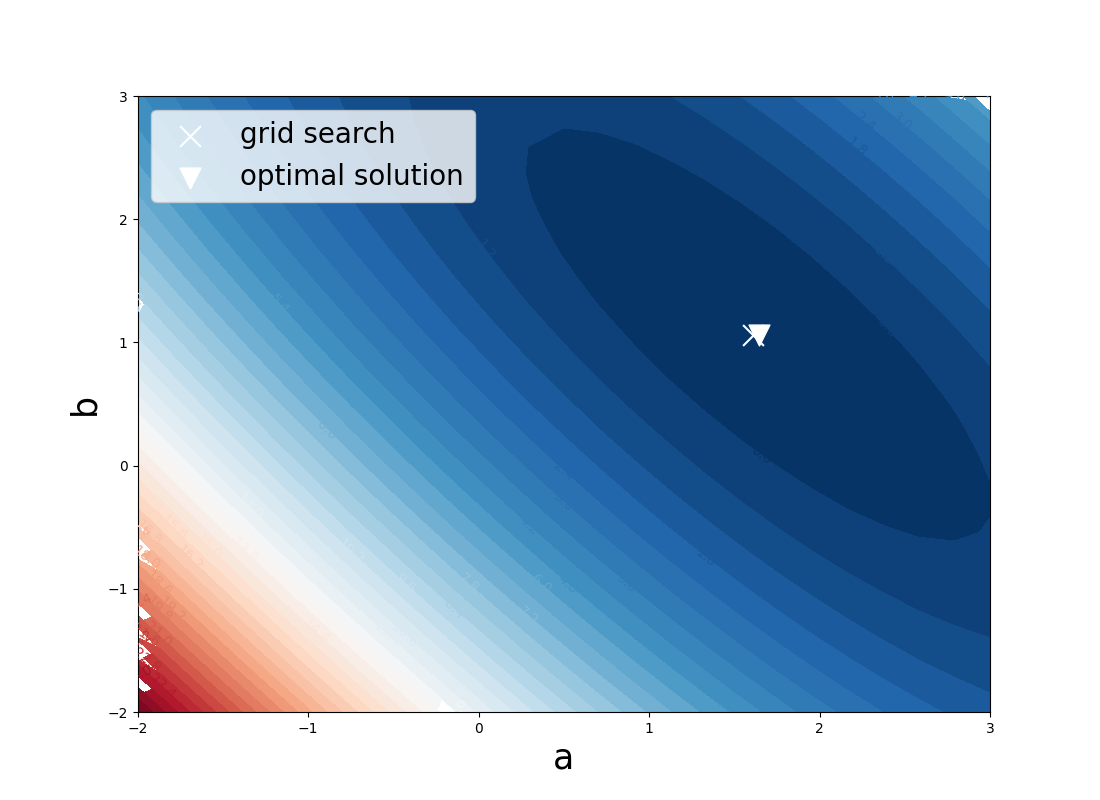

In [21]:
n_grid = 25
a_grid = np.linspace(-2, 3, n_grid)
b_grid = np.linspace(-2, 3,  n_grid)
a_, b_ = np.meshgrid(a_grid, b_grid)
a_b = np.column_stack((a_.flatten(), b_.flatten()))

total_error_ = []
for abi in a_b:
    a, b = abi[0], abi[1]
    ei = linear_model_total_error(a, b, x, y)
    total_error_.append(ei)
total_error_ = np.array(total_error_)
total_error_ = total_error_.reshape(a_.shape)


b_opt, a_opt = w_opt[0], w_opt[1]
fig, ax = plt.subplots(figsize=(11, 8))
CS = ax.contourf(a_, b_, total_error_, levels=50, cmap='RdBu_r')
ax.scatter(mb_best[0], mb_best[1],
           zorder=10, color='w', marker='x', s=225,label='grid search')
ax.scatter(a_opt, b_opt,
           zorder=10, color='w', marker='v', s=225, label='optimal solution')
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('a', fontsize=25)
ax.set_ylabel('b', fontsize=25)
ax.legend(loc='upper left', fontsize=20)

Prediction with these parameters is no different. 

$$
f(\mathbf{X}_{new}) = \mathbf{X}_{new}^\top \mathbf{w}^* = \mathbf{X}_{new}^\top \underbrace{{(\mathbf{X}^\top\mathbf{X})}^{-1}\mathbf{X}^\top  \mathbf{Y}}_{\mathbf{w}^*} \\
$$
we do not need to compute ${(\mathbf{X}^\top\mathbf{X})}^{-1}\mathbf{X}^\top  \mathbf{Y}$ every time we do prediction, we only need to solve for it ones and store the vector $\mathbf{w}^*$.

<!-- f(\mathbf{X}) = \begin{bmatrix}
1 & x_{0} \\
1 & x_{1} \\
 \vdots \\
1 & x_{10} \\
\end{bmatrix}\begin{bmatrix}
b \\
a
\end{bmatrix} = \begin{bmatrix}
a\;x_1+b \\
a\;x_2+b \\
\vdots \\
a\;x_n+b \\
\end{bmatrix} -->

In [ ]:
# Build the design matrix

x_grid = np.linspace(-0, 2, 100)  # change the number of points
X = np.column_stack((np.ones_like(x_grid), x_grid))
print(X.shape)
print(X)

# prediction
y_pred = X @ w_opt


# plot the result
fig, ax = plt.subplots(figsize=(11, 8))
ax.scatter(x, y, label='data', s=75)
ax.plot(x_grid, y_pred, c='k', marker='o',
        label='model prediction', markersize=5)

ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$f(x)$', fontsize=20)
ax.legend(fontsize=18)

In [ ]:
b, a = w_opt[0], w_opt[1]
x_grid = np.linspace(0, 2, 100)
y_grid = linear_model(a, b, x_grid)

# y_pred = linear_model(a, b, x)
y_pred = np.column_stack((np.ones_like(x), x)) @ w_opt
error = y_pred - y


# plotting code

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Error in linear models')

# left panel
ax1.plot(x_grid, y_grid, c='k')
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    if error_i > 0:
        ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i))
    else:
        ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i)
ax1.text(0.1, .9, f'a = {a:.3f}, b = {b:.3f}',
         fontsize=20, transform=ax1.transAxes)
ax1.scatter(x, y, s=45)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-2, 12)
ax1.set_ylabel(r'$a\;x + b$', fontsize=20)
ax1.set_xlabel(r'$x$,', fontsize=20)

# right panel
sum_errors = 0.
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    sum_errors += error_i**2

    ax2.scatter(xi, error_i**2, color='k', s=50)
ax2.text(0.1, 0.8, r'$\sum_i^n \epsilon_i^2 = $' + f'{sum_errors:.4f}',
         transform=ax2.transAxes, fontsize=16)
ax2.set_ylabel(r'$(\hat{y}_i - f(x_i))^2$', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)

plt.tight_layout()